In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px 

df = pd.read_csv ('US Superstore data.xls') 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
df.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156  2016-11-08  2016-11-11    Second Class   
1          2  CA-2016-152156  2016-11-08  2016-11-11    Second Class   
2          3  CA-2016-138688  2016-06-12  2016-06-16    Second Class   
3          4  US-2015-108966  2015-10-11  2015-10-18  Standard Class   
4          5  US-2015-108966  2015-10-11  2015-10-18  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422  2014-01-21  2014-01-23    Second Class   
9990    9991  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9991    9992  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9992    9993  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9993    9994  CA-2017-119914  2017-05-04  2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520    

In [5]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [11]:
# Convertir la colonne 'Order Date' en type datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

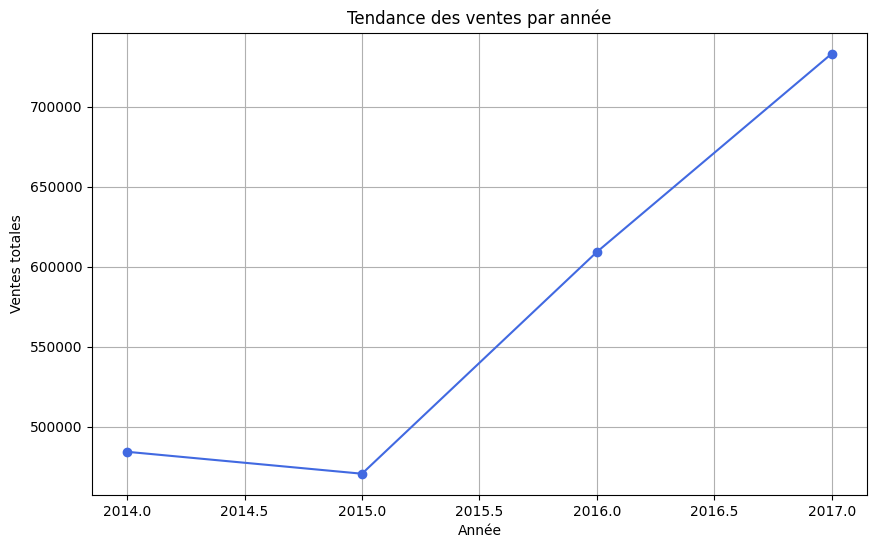

In [12]:
df['Year'] = df['Order Date'].dt.year
annual_sales = df.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(annual_sales['Year'], annual_sales['Sales'], marker='o', color='royalblue')
plt.title('Tendance des ventes par année')
plt.xlabel('Année')
plt.ylabel('Ventes totales')
plt.grid(True)
plt.show()

In [ ]:
#  d'interprétation :
# "Le graphique montre une forte augmentation des ventes a partir de l'année 2015,
# ce qui suggère que la croissance du marché est variable."

In [15]:
country_sales = df.groupby('Country')['Sales'].sum().reset_index()

In [34]:
!pip install --upgrade nbformat



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
fig = px.choropleth(country_sales, 
                    locations='Country', 
                    locationmode='country names',
                    color='Sales',
                    color_continuous_scale='Blues',
                    title='Répartition des ventes par pays')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

C:\Users\Amin\AppData\Local\Temp\ipykernel_2712\4269740359.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




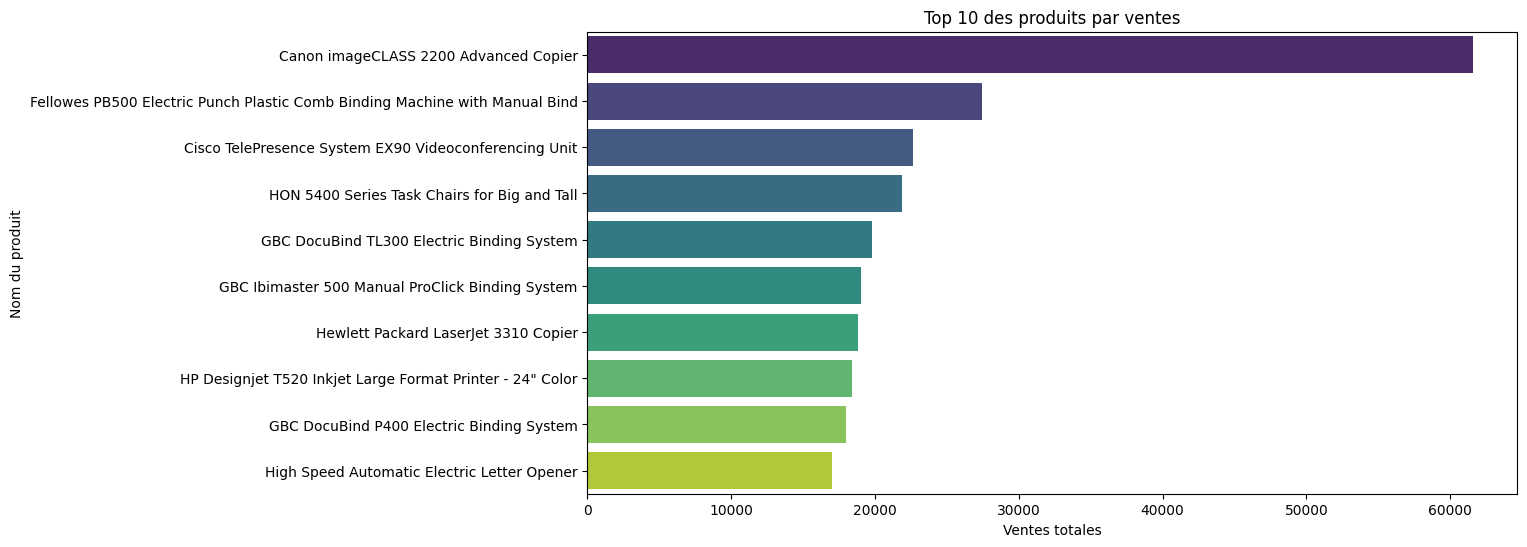

In [32]:
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=product_sales, palette='viridis')
plt.title('Top 10 des produits par ventes')
plt.xlabel('Ventes totales')
plt.ylabel('Nom du produit')
plt.show()

In [ ]:
# Exemple d'interprétation attendue :
# Le graphique à barres met en évidence les 10 produits les plus vendus, 
#  ce qui nous aides à identifier le best-sellers pour orienter la stratégie marketing, ici Canon imageclass 2200.

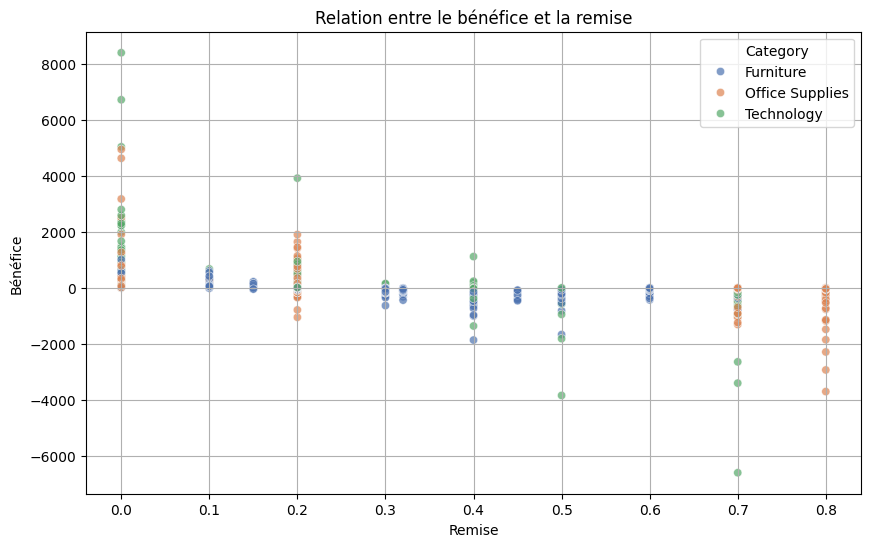

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', palette='deep', alpha=0.7)
plt.title('Relation entre le bénéfice et la remise')
plt.xlabel('Remise')
plt.ylabel('Bénéfice')
plt.grid(True)
plt.show()

In [ ]:
# Le nuage de points montre une tendance que plus il ya de remise plus il ya de ppertes entre les remises et le bénéfice.
# On peut observer que des remises élevées sont souvent associées à un bénéfice moindre, ce qui suggère une relation négative.